In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DataSets/Boston Housing/housing.data', delimiter=r"\s+")
column_names= ['Crime Rate', 'Residential Land Zoned', 'Non-retail Business Acres', 'Charles River Dummy', 'Nitric Oxides Concentration',
              'Rooms per Dwelling', 'Owner Occupied pre1940', 'Weighted Distance to Employment Centres', 'Radial Highway Accessibility Index',
              'Property Tax', 'Pupil Teacher Ratio', 'Blacks', 'Lower Status', 'Median Value']

df.shape
df.columns = column_names

In [3]:
df.head()

,Crime Rate,Residential Land Zoned,Non-retail Business Acres,Charles River Dummy,Nitric Oxides Concentration,Rooms per Dwelling,Owner Occupied pre1940,Weighted Distance to Employment Centres,Radial Highway Accessibility Index,Property Tax,Pupil Teacher Ratio,Blacks,Lower Status,Median Value
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [4]:
LS = 'Lower Status'
MV = 'Median Value'

In [5]:
x = df[LS].values.reshape(-1,1)
y = df[MV].values

In [6]:
x.shape

(505, 1)

In [7]:
y.shape

(505,)

In [8]:
pairs = [ (sample[0],y[idx]) for idx,sample in enumerate(x)  ]

In [9]:
pairs

[(9.14, 21.6),
 (4.03, 34.7),
 (2.94, 33.4),
 (5.33, 36.2),
 (5.21, 28.7),
 (12.43, 22.9),
 (19.15, 27.1),
 (29.93, 16.5),
 (17.1, 18.9),
 (20.45, 15.0),
 (13.27, 18.9),
 (15.71, 21.7),
 (8.26, 20.4),
 (10.26, 18.2),
 (8.47, 19.9),
 (6.58, 23.1),
 (14.67, 17.5),
 (11.69, 20.2),
 (11.28, 18.2),
 (21.02, 13.6),
 (13.83, 19.6),
 (18.72, 15.2),
 (19.88, 14.5),
 (16.3, 15.6),
 (16.51, 13.9),
 (14.81, 16.6),
 (17.28, 14.8),
 (12.8, 18.4),
 (11.98, 21.0),
 (22.6, 12.7),
 (13.04, 14.5),
 (27.71, 13.2),
 (18.35, 13.1),
 (20.34, 13.5),
 (9.68, 18.9),
 (11.41, 20.0),
 (8.77, 21.0),
 (10.13, 24.7),
 (4.32, 30.8),
 (1.98, 34.9),
 (4.84, 26.6),
 (5.81, 25.3),
 (7.44, 24.7),
 (9.55, 21.2),
 (10.21, 19.3),
 (14.15, 20.0),
 (18.8, 16.6),
 (30.81, 14.4),
 (16.2, 19.4),
 (13.45, 19.7),
 (9.43, 20.5),
 (5.28, 25.0),
 (8.43, 23.4),
 (14.8, 18.9),
 (4.81, 35.4),
 (5.77, 24.7),
 (3.95, 31.6),
 (6.86, 23.3),
 (9.22, 19.6),
 (13.15, 18.7),
 (14.44, 16.0),
 (6.73, 22.2),
 (9.5, 25.0),
 (8.05, 33.0),
 (4.67, 23.

# ROBUST REGRESSION

Linear Regression is heavily affected by a few outliers. There is a need for a correction or a workaround this issue.

Strategy is to define how to detect an outlier and seperate it from the inliers.
We need to decide on a model that classifies our data into inliers and outliers. The catch is that this model needs do be generated from the data itself.

Solution Proposal:

1-> Generate a model using random sampling of N samples.

2-> Fit a model to this N samples.

3-> Predict all the data using this model.

4-> Set a threshold for inlier/outlier boundry.

5-> Choose the model that has the least outliers as our most robust model.

In [10]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import random

In [11]:
iteration = 5000
N = 100
boundary = 100

In [12]:
def getNRandomSamples(array,N):
    random.shuffle(array)
    return array[:min(N,len(array))]

def average(array):
    return sum(array)/len(array)

In [13]:
winner_model = None
max = -1
i = 0
while(iteration > 0):
    iteration = iteration - 1
    # Initialize Model
    model = LinearRegression(fit_intercept=True)
    
    # Prepare Random Sample
    randomSampleSet = getNRandomSamples(pairs,N)
    x = np.asarray([ pair[0] for pair in pairs]).reshape(-1,1)
    y = np.asarray([ pair[1] for pair in pairs])
    X = np.asarray([ pair[0] for pair in randomSampleSet]).reshape(-1,1)
    Y = np.asarray([ pair[1] for pair in randomSampleSet])

    # Fit Model
    model.fit(X.reshape(-1,1),Y)

    # Prediction
    predictions = model.predict(x)
    errors = [ (y[idx] - prediction) ** 2 for idx,prediction in enumerate(predictions)]

    # Stats of Model
    average_error = average(errors)
    standart_deviation = np.std(errors)

    #Inliers
    inlier_mask = [ error < average_error+(standart_deviation) for error in errors]
    if(max < sum(inlier_mask)):
        max = sum(inlier_mask)
        winner_model = model

In [16]:
winner_model.coef_

array([-0.88818248])

In [17]:
x = np.asarray([ pair[0] for pair in pairs]).reshape(-1,1)
y = np.asarray([ pair[1] for pair in pairs])
predictions = winner_model.predict(x)
errors = [ (y[idx] - prediction) ** 2 for idx,prediction in enumerate(predictions)]

# Stats of Model
average_error = average(errors)
standart_deviation = np.std(errors)
inlier_mask = [ error < average_error+(standart_deviation) for error in errors]

In [18]:
average_error

38.92203683121227

In [19]:
standart_deviation

78.65677713246002

In [20]:
sum(inlier_mask)

471

In [21]:
x_inliers = [x[i] for i in range(len(x)) if inlier_mask[i]]
y_inliers = [y[i] for i in range(len(y)) if inlier_mask[i]]

x_outliers = [x[i] for i in range(len(x)) if not inlier_mask[i]]
y_outliers = [y[i] for i in range(len(y)) if not inlier_mask[i]]

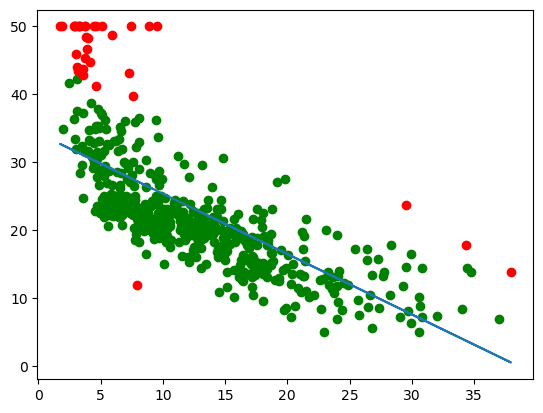

In [22]:
plt.scatter(x_inliers, y_inliers, color='green', label='Inliers')
plt.scatter(x_outliers, y_outliers, color='red', label='Outliers')
plt.plot(x,predictions)